Duration

## 1. 채권 Duration 사례

### 1-1 개별 채권

In [2]:
import numpy as np
import pandas as pd

# 채권 조건
face_value = 100
coupon_rate = 0.05
maturity = 3
ytm = 0.05

# 현금흐름 생성
cash_flows = [face_value * coupon_rate] * (maturity - 1) + [face_value * (1 + coupon_rate)]

discounted_cf = []
t_times_pv = []

for t, cf in enumerate(cash_flows, start=1):
    pv = cf / (1 + ytm) ** t
    discounted_cf.append(pv)
    t_times_pv.append(t * pv)

price = sum(discounted_cf)
duration_mac = sum(t_times_pv) / price
duration_mod = duration_mac / (1 + ytm)

# 결과표 출력
duration_df = pd.DataFrame({
    '연도': range(1, maturity + 1),
    '현금흐름': cash_flows,
    '할인된 현금흐름': discounted_cf,
    '기간 × 할인 CF': t_times_pv
})

print("📄 채권 듀레이션 계산표:")
print(duration_df.round(2))

print(f"\n📌 Macaulay Duration: {duration_mac:.4f} 년")
print(f"📌 Modified Duration: {duration_mod:.4f} 년")


📄 채권 듀레이션 계산표:
   연도   현금흐름  할인된 현금흐름  기간 × 할인 CF
0   1    5.0      4.76        4.76
1   2    5.0      4.54        9.07
2   3  105.0     90.70      272.11

📌 Macaulay Duration: 2.8594 년
📌 Modified Duration: 2.7232 년


### 2-2. 포트폴리오 듀레이션

In [ ]:
# 두 채권으로 구성된 포트폴리오
# 채권 A: Macaulay 듀레이션 3.0년, 시장가치 60만원
# 채권 B: Macaulay 듀레이션 6.5년, 시장가치 40만원

In [6]:
import numpy as np
import pandas as pd

# 각 채권의 듀레이션과 시장가치
durations = np.array([3.0, 6.5])          # 각 채권의 듀레이션 (Macaulay 기준)
market_values = np.array([600000, 400000])  # 각 채권의 시장가치

# 비중 계산
weights = market_values / np.sum(market_values)

# 포트폴리오 듀레이션 계산
portfolio_duration = np.dot(weights, durations)

# 출력
df = pd.DataFrame({
    "채권": ["채권 A", "채권 B"],
    "시장가치": market_values,
    "비중": weights,
    "듀레이션": durations,
    "비중 × 듀레이션": weights * durations
})

print("📄 포트폴리오 듀레이션 계산표:")
print(df.round(2))
print(f"\n📌 포트폴리오 Macaulay Duration: {portfolio_duration:.4f}년")


📄 포트폴리오 듀레이션 계산표:
     채권    시장가치   비중  듀레이션  비중 × 듀레이션
0  채권 A  600000  0.6   3.0        1.8
1  채권 B  400000  0.4   6.5        2.6

📌 포트폴리오 Macaulay Duration: 4.4000년


### 1-3 만기별 채권듀레이션

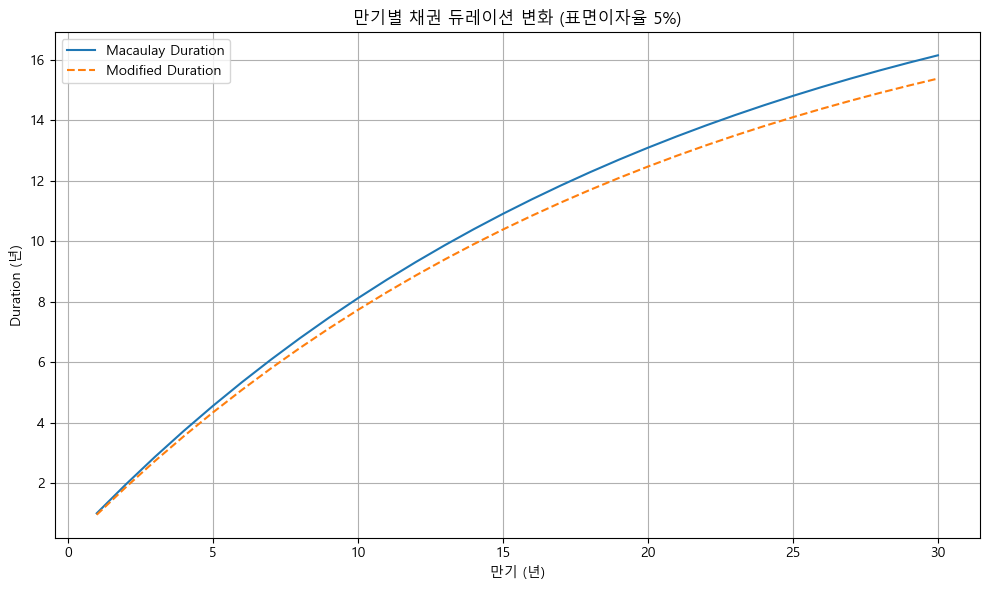

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 공통 조건
face_value = 100
coupon_rate = 0.05
ytm = 0.05

# 다양한 만기 (1년 ~ 30년)
maturities = np.arange(1, 31)
macaulay_durations = []
modified_durations = []

for maturity in maturities:
    # 현금흐름 생성
    cash_flows = [face_value * coupon_rate] * (maturity - 1) + [face_value * (1 + coupon_rate)]
    
    discounted_cf = []
    t_times_pv = []

    for t, cf in enumerate(cash_flows, start=1):
        pv = cf / (1 + ytm) ** t
        discounted_cf.append(pv)
        t_times_pv.append(t * pv)

    price = sum(discounted_cf)
    d_mac = sum(t_times_pv) / price
    d_mod = d_mac / (1 + ytm)

    macaulay_durations.append(d_mac)
    modified_durations.append(d_mod)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(maturities, macaulay_durations, label='Macaulay Duration')
plt.plot(maturities, modified_durations, label='Modified Duration', linestyle='--')
plt.title("만기별 채권 듀레이션 변화 (표면이자율 5%)")
plt.xlabel("만기 (년)")
plt.ylabel("Duration (년)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 초기에는 만기 증가에 따라 듀레이션이 빠르게 증가하지만,
# 일정 시점 이후 점점 증가 속도가 둔화됩니다.
# Modified Duration은 항상 Macaulay보다 조금 더 작게 나타납니다 (이자율로 나누었기 때문).

## 2. 금리변화에 따른 채권가격 변화

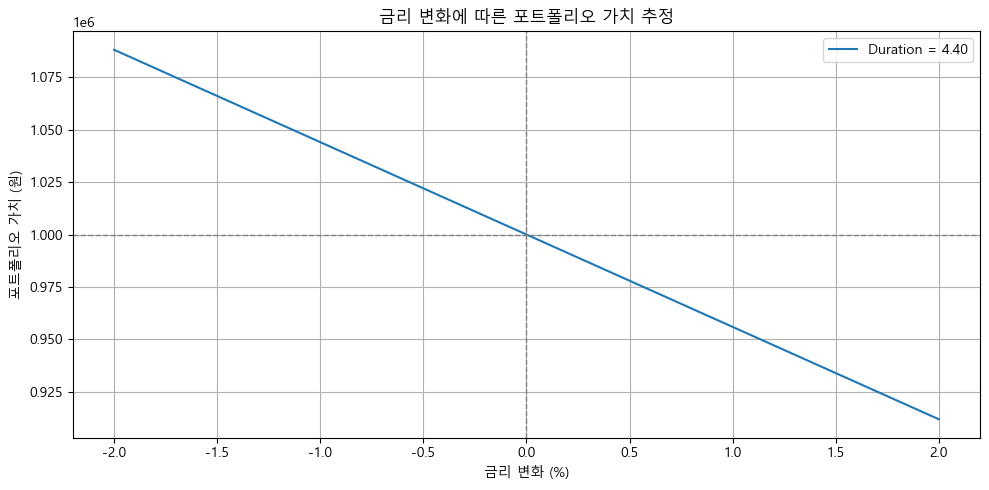

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows: Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호도 깨지지 않게

# 채권 포트폴리오 예시
durations = np.array([3.0, 6.5])             # 각 채권의 듀레이션 (Macaulay 기준)
market_values = np.array([600000, 400000])   # 시장가치

# 포트폴리오 전체 가치와 듀레이션
weights = market_values / market_values.sum()
portfolio_duration = np.dot(weights, durations)
portfolio_value = market_values.sum()

# 금리 변화 시나리오 (% 단위 → 소수점 변환)
rate_changes = np.linspace(-0.02, 0.02, 100)  # -2% ~ +2% 금리 변화
value_changes = []

for delta_r in rate_changes:
    # Modified duration 기반: 가격 변화율 = -Duration × 금리 변화
    price_change = -portfolio_duration * delta_r
    new_value = portfolio_value * (1 + price_change)
    value_changes.append(new_value)

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(rate_changes * 100, value_changes, label=f'Duration = {portfolio_duration:.2f}')
plt.axhline(portfolio_value, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.title("금리 변화에 따른 포트폴리오 가치 추정")
plt.xlabel("금리 변화 (%)")
plt.ylabel("포트폴리오 가치 (원)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 2-2 금리변화에 따른 채권가치 변화 (볼록성 고려)

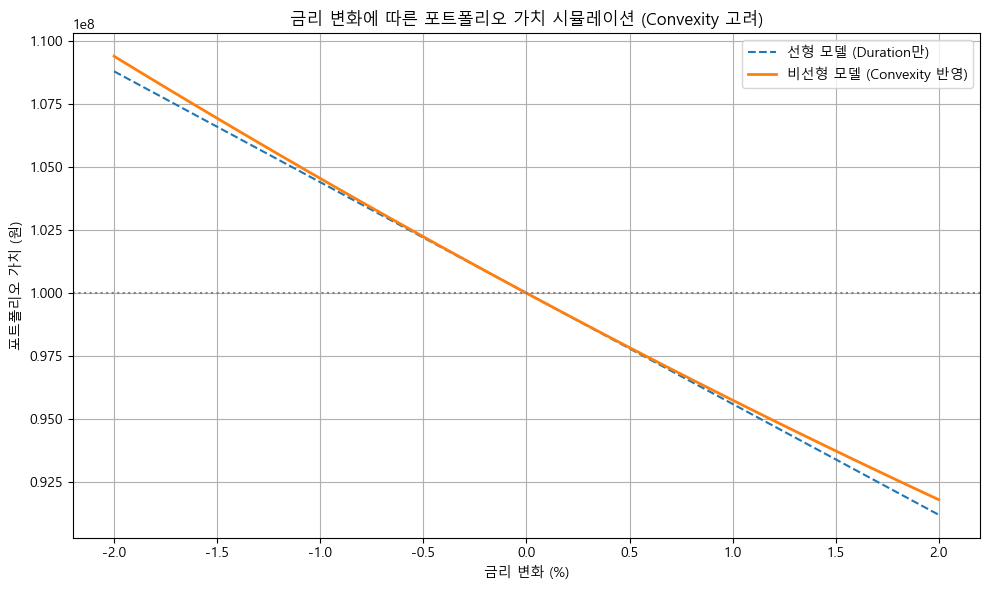

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 채권 포트폴리오 정보
duration = 4.4         # 포트폴리오의 Modified Duration (년)
convexity = 30.0       # 예시 포트폴리오의 Convexity (보통 20~100 사이)
portfolio_value = 100_000_000  # 포트폴리오 가치: 1억 원

# 금리 변화 시나리오 (% 단위 → 소수점 변환)
rate_changes = np.linspace(-0.02, 0.02, 100)  # -2% ~ +2%
value_linear = []
value_convex = []

for dr in rate_changes:
    # 선형 모델: Modified Duration만 고려
    pct_change_linear = -duration * dr

    # 비선형 모델: Duration + Convexity 반영
    pct_change_convex = -duration * dr + 0.5 * convexity * (dr ** 2)

    value_linear.append(portfolio_value * (1 + pct_change_linear))
    value_convex.append(portfolio_value * (1 + pct_change_convex))

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(rate_changes * 100, value_linear, label='선형 모델 (Duration만)', linestyle='--')
plt.plot(rate_changes * 100, value_convex, label='비선형 모델 (Convexity 반영)', linewidth=2)
plt.axhline(portfolio_value, color='gray', linestyle=':')
plt.title("금리 변화에 따른 포트폴리오 가치 시뮬레이션 (Convexity 고려)")
plt.xlabel("금리 변화 (%)")
plt.ylabel("포트폴리오 가치 (원)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 금리가 ±1% 변할 때:
# Duration만 고려 시: 약 4.4% 가격 변화

# Convexity 반영 시: 금리 상승 시 손실은 덜, 금리 하락 시 수익은 더 큼
# → 즉, Convexity는 투자자에게 우호적인 비대칭 효과

## 3. 듀레이션 갭 계산 

In [14]:
# 소수점 오차 보정: 가장 가까운 인덱스를 찾아 계산
idx_up = np.argmin(np.abs(rate_changes - 0.01))
idx_down = np.argmin(np.abs(rate_changes + 0.01))

{
    "Duration Gap (자산 - 부채)": duration_gap,
    "초기 NPV (억 원)": (asset_value - liability_value) / 1e9,
    "금리 +1% 시 NPV 변화 (억 원)": npv_changes[idx_up],
    "금리 -1% 시 NPV 변화 (억 원)": npv_changes[idx_down]
}


{'Duration Gap (자산 - 부채)': 2.0,
 '초기 NPV (억 원)': 10.0,
 '금리 +1% 시 NPV 변화 (억 원)': -2.2767676767676766,
 '금리 -1% 시 NPV 변화 (억 원)': 2.2767676767676774}

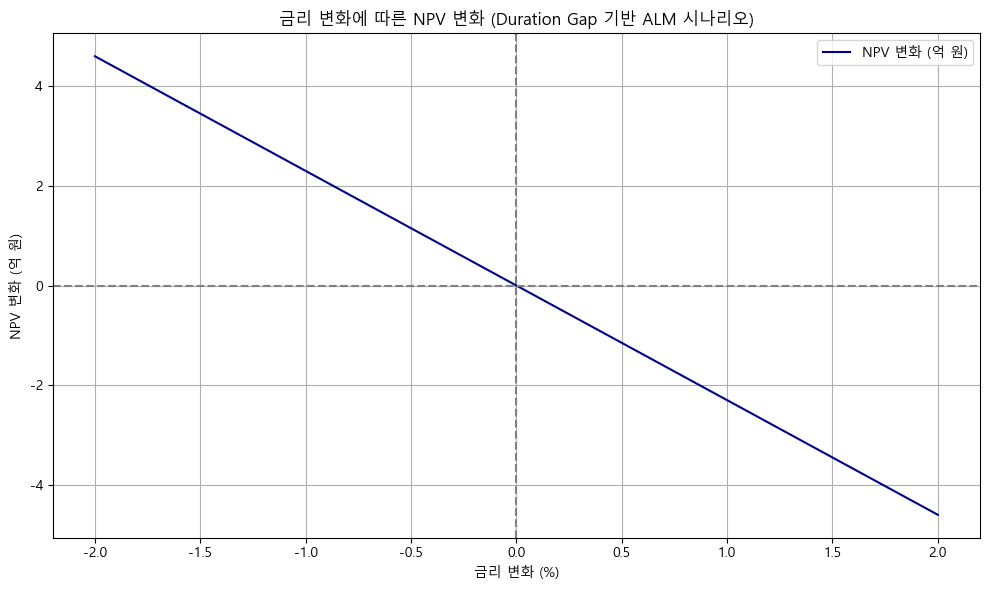

ValueError: 0.01 is not in list

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 예시: ALM 포지션
# 자산: 5년 듀레이션, 100억 원
# 부채: 3년 듀레이션, 90억 원

asset_value = 100_000_000_000
asset_duration = 5.0

liability_value = 90_000_000_000
liability_duration = 3.0

# 1. 듀레이션 갭 계산
duration_gap = asset_duration - liability_duration

# 2. 금리 변화 시나리오 (-2% ~ +2%)
rate_changes = np.linspace(-0.02, 0.02, 100)
npv_changes = []

for delta_r in rate_changes:
    # 자산/부채 가치 변화율
    dA = -asset_duration * delta_r * asset_value
    dL = -liability_duration * delta_r * liability_value
    dNPV = dA - dL
    npv_changes.append(dNPV / 1e9)  # 억 단위로 변환

# 3. 시각화
plt.figure(figsize=(10, 6))
plt.plot(rate_changes * 100, npv_changes, label='NPV 변화 (억 원)', color='darkblue')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title("금리 변화에 따른 NPV 변화 (Duration Gap 기반 ALM 시나리오)")
plt.xlabel("금리 변화 (%)")
plt.ylabel("NPV 변화 (억 원)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 계산 결과 출력
{
    "Duration Gap (자산 - 부채)": duration_gap,
    "초기 NPV": asset_value - liability_value,
    "금리 +1% 시 NPV 변화 (억 원)": npv_changes[rate_changes.tolist().index(0.01)],
    "금리 -1% 시 NPV 변화 (억 원)": npv_changes[rate_changes.tolist().index(-0.01)]
}


In [17]:
# 소수점 오차 보정: 가장 가까운 인덱스를 찾아 계산
idx_up = np.argmin(np.abs(rate_changes - 0.01))
idx_down = np.argmin(np.abs(rate_changes + 0.01))

{
    "Duration Gap (자산 - 부채)": duration_gap,
    "초기 NPV (억 원)": (asset_value - liability_value) / 1e9,
    "금리 +1% 시 NPV 변화 (억 원)": npv_changes[idx_up],
    "금리 -1% 시 NPV 변화 (억 원)": npv_changes[idx_down]
}


{'Duration Gap (자산 - 부채)': 2.0,
 '초기 NPV (억 원)': 10.0,
 '금리 +1% 시 NPV 변화 (억 원)': -2.2767676767676766,
 '금리 -1% 시 NPV 변화 (억 원)': 2.2767676767676774}